# Homework 4

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
def Vander(x,K):
    phi=np.zeros((x.shape[0],K))
    for i in range(K):
        phi[:,i]=x**i
    return phi

def average_abs_error(theta,Testdata):
    Xtest=Testdata[0]
    Ytest=Testdata[1]
    return np.linalg.norm(np.vander(Xtest,len(theta))@theta-Ytest,2)*(1/len(Ytest))

def split_data(X,Y,NTrain):
    index=np.linspace(0,len(Y)-1,len(Y),dtype=int)
    np.random.shuffle(index)
    X,Y =X[index],Y[index]
    Xtrain,Ytrain=X[:NTrain], Y[:NTrain]
    Xtest,Ytest=X[NTrain:],Y[NTrain:]
    return Xtrain,Ytrain ,Xtest,Ytest

def ftheta_map(data,k,lamda):
    X,Y=data[0],data[1]
    Phi=np.vander(X,k)
    theta_map_k=np.linalg.solve(Phi.T@Phi + lamda*np.identity(k), Phi.T@Y)
    return theta_map_k


In [ ]:
N=100
K=4
theta=np.ones((K,))
a,b=0,1
X=np.random.uniform(low=a,high=b,size=N)
variance=1
Phi=np.vander(X,K)
Y=Phi@theta+np.random.normal(0,variance,size=N)
plt.scatter(X,Y);


### Part 3

K=  3


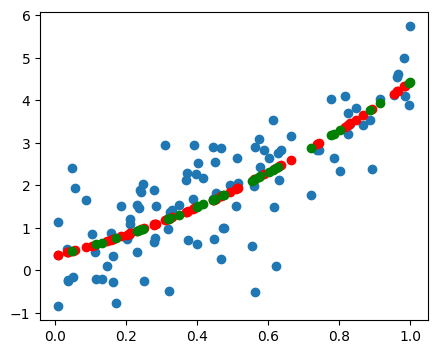

K=  4


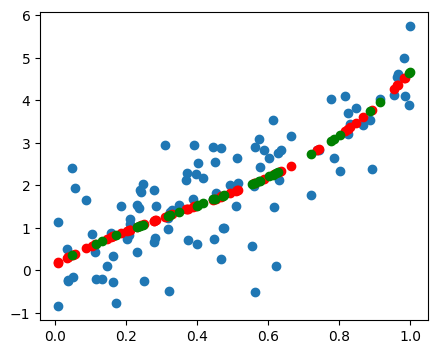

K=  5


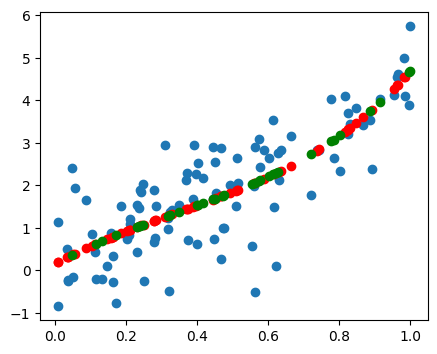

K=  10


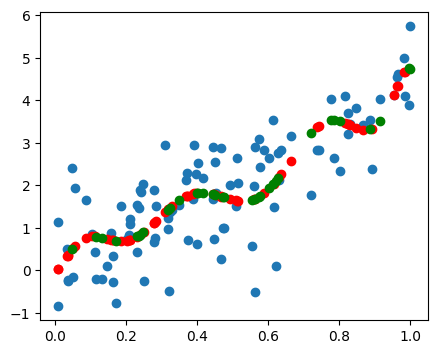

K=  20


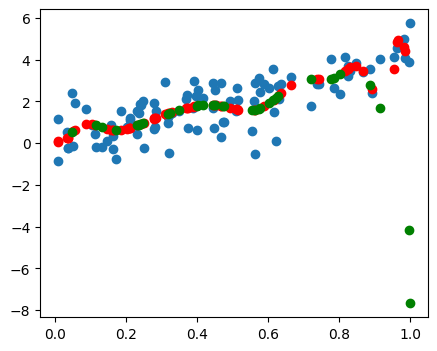

K=  30


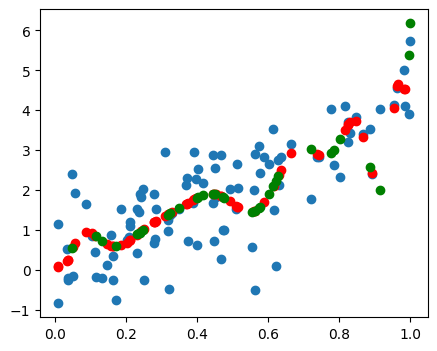

In [126]:
K_vec=[3,4,5,10,20,30]
Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))
for k in K_vec:
    plt.figure(figsize=(5,4))
    print("K= ",k)
    plt.scatter(X,Y);#plot the data
    Phi=np.vander(Xtrain,k)
    theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
    Y_approx_train=Phi@theta_MLE
    plt.scatter(Xtrain,Y_approx_train, c="red");
    Phi=np.vander(Xtest,k)#plot the test data
    Y_approx_test=Phi@theta_MLE
    plt.scatter(Xtest,Y_approx_test,c="green")  
    plt.show()

In [112]:
Xtrain,Ytrain ,Xtest,Ytest=split_data(X,Y,int(N-N/3))
Xtest=np.random.uniform(low=a,high=b,size=len(Xtest))

### Quesito 6

In [ ]:
K_vec=[1,2,4,5,10,20,100]
lmda=[1,0.1,0.01]
for k in K_vec:
    plt.figure(figsize=(12,3))
    for l in range(len(lmda)):
        plt.subplot(1,len(lmda),l+1)
        plt.title(f"K={k} e lambda={lmda[l]}")
        plt.xlabel("Xtest")
        plt.ylabel("Ytest")
        Phi=np.vander(Xtrain,k)
        theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
        
        
        
        variance=1
        Phi=np.vander(Xtest,k)
        theta=np.ones((k,))
        Y_approx_test=Phi@theta_MLE
        
        Ytest=Phi@theta+np.random.normal(0,variance,size=len(Xtest))
        theta_map=ftheta_map((Xtrain,Ytrain),k,lmda[l])
        Y_approx_map=Phi@theta_map
        #print(theta.shape)
        #print(theta_MLE.shape)
        #print(theta_map.shape)
        print("K=",k)
        D=plt.scatter(Xtest,Ytest)
        D_mle=plt.scatter(Xtest,Y_approx_test,c="red")
        D_map=plt.scatter(Xtest,Y_approx_map,c="green")
        plt.legend((D,D_mle,D_map),("Data","Y_mle","Y_map"))
        print(f"TRAIN abs err K={k} =",average_abs_error(theta_MLE,(Xtrain,Ytrain)))
        print(f"TEST abs error K={k} =", average_abs_error(theta_MLE,(Xtest,Ytest)))
        print(f"TEST abs err theta male for K={k} and λ={lmda} is =",
            average_abs_error(theta_map,(Xtest,Ytest)))
    plt.show()
    print("********************************************************************")
    
 

### Quesito 7

In [ ]:
K_greater=[ i for i in range(5,100,5)]
lbmda=[10,1,0.1,0.01]
for k in K_greater:
    print(f"K={k}")
    for l in range(len(lbmda)):
        Phi=np.vander(Xtrain,k)
        theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
        Phi=np.vander(Xtest,k)
        Y_mle=Phi@theta_MLE#it's on the test set
        theta_map=ftheta_map((Xtrain,Ytrain),k,lbmda[l])
        Y_map=Phi@theta_map# it's on the test set
        MLE_err=average_abs_error(theta_MLE,(Xtest,Ytest))
        MAP_err=average_abs_error(theta_map,(Xtest,Ytest))
        print(f"MLE error",MLE_err) if l==0 else None
        print(f"MAP err for λ={lbmda[l]} =",MAP_err)
    print("***************")   
        

### Quesito 9

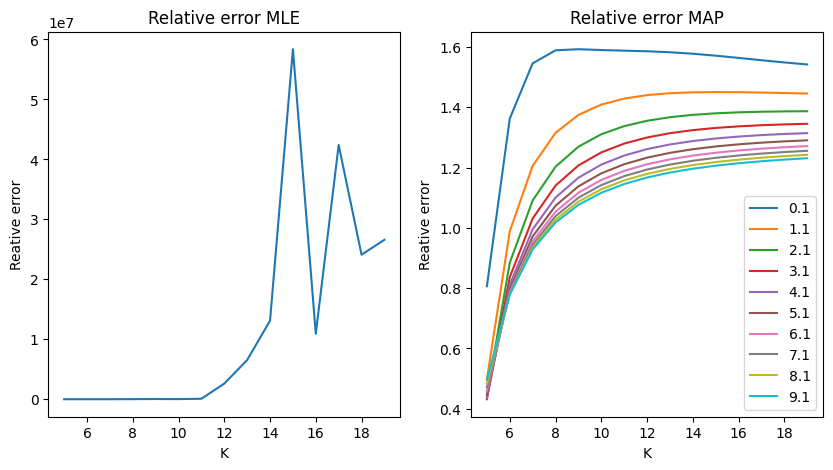

In [122]:
K_greater=np.array([i for i in range(5,20,1)],dtype=int)
lmbda=[i for i in np.arange(0.1,10,1)]
def rel_error(theta):
    return np.linalg.norm(theta-np.concatenate((np.ones((K,)),np.zeros((len(theta)-K,))),axis=0),2)/np.linalg.norm(np.ones((K,)),2)

error_MLE=np.zeros((len(K_greater),))
error_MAP=np.zeros((len(K_greater),len(lmbda)))
for k in range(len(K_greater)):
    Phi=np.vander(Xtrain,K_greater[k])
    theta_MLE=np.linalg.solve(Phi.T@Phi,Phi.T@Ytrain)
    error_MLE[k]=rel_error(theta_MLE)
    for l in range(len(lmbda)):
        theta_map=ftheta_map((Xtrain,Ytrain),K_greater[k],lmbda[l])
        error_MAP[k,l]=rel_error(theta_map)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("Relative error MLE")
plt.xlabel("K")
plt.ylabel("Reative error")
plt.plot(K_greater,error_MLE);
plt.subplot(1,2,2)
plt.title("Relative error MAP")
plt.xlabel("K")
plt.ylabel("Reative error")
for l in range(len(lmbda)):
        plt.plot(K_greater,error_MAP[:,l])
plt.legend([f"{i}" for i in lmbda]);
plt.show()

### Point 10